## Plot sample Images

In [1]:
from src.utils import track_files, plot_image_grid

DATA_DIR = "dr-detection/data/diabetic-retinopathy-dataset/sample/"
image_files = track_files(DATA_DIR)

plot_image_grid(image_files, roi_crop=True)

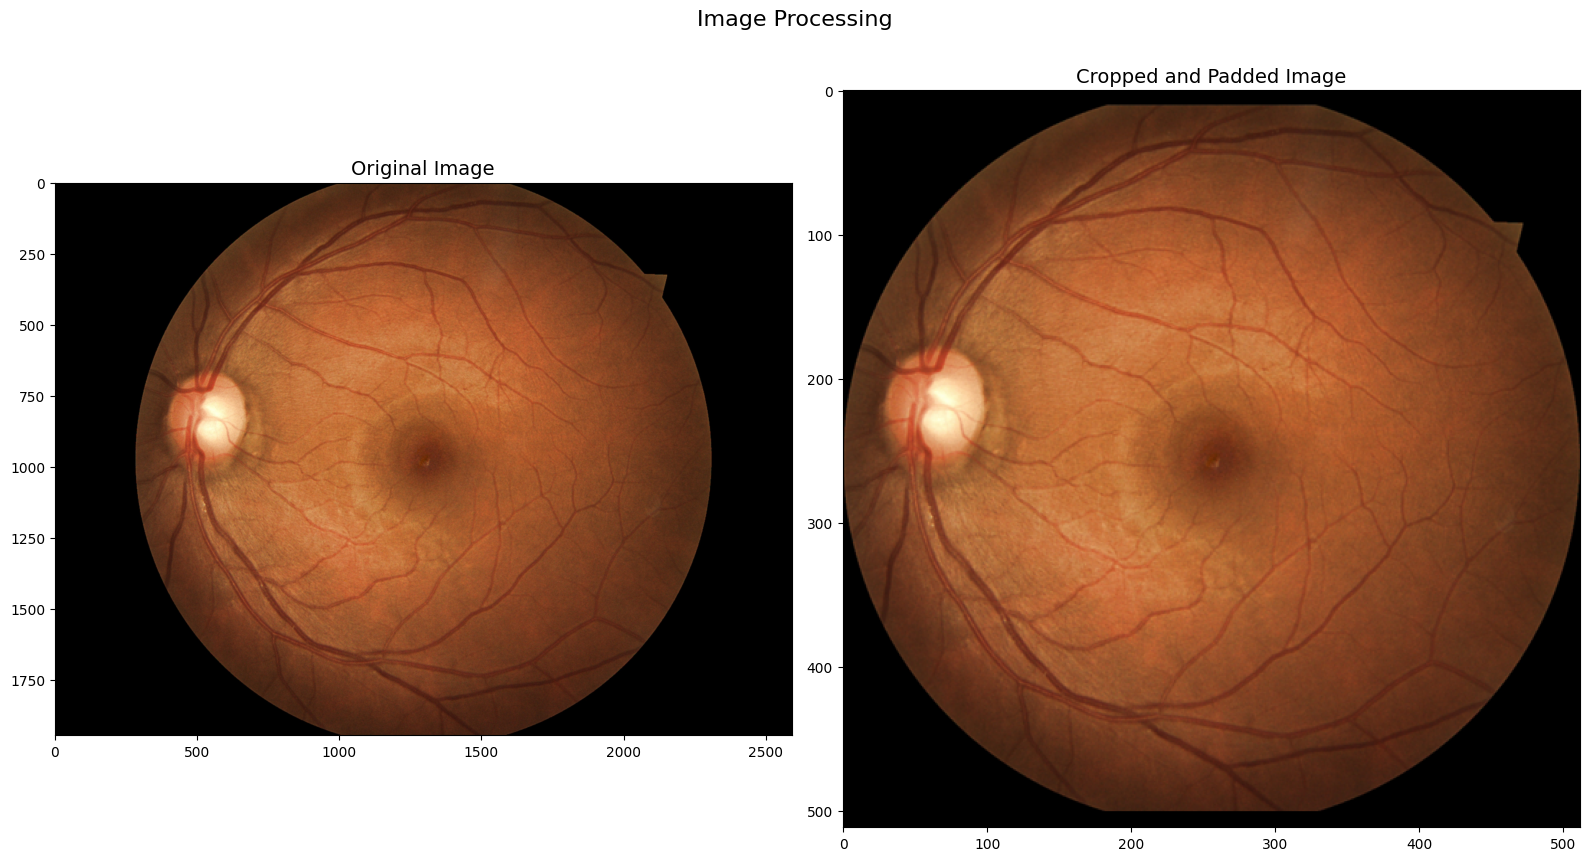

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
from src.utils import crop_and_pad_image
from torchvision import transforms as T

# Load the source image
image_path = image_files[2]  # Assuming image_files is defined elsewhere
src_image = Image.open(image_path)

# Crop and pad the image
cropped_image = crop_and_pad_image(image_path)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

# Plot source image with title
axes[0].imshow(src_image)
axes[0].set_title("Original Image", fontsize=14)

# Plot cropped image with title
axes[1].imshow(cropped_image)
axes[1].set_title("Cropped and Padded Image", fontsize=14)

# Add title to the entire figure
fig.suptitle("Image Processing", fontsize=16)

# Adjust layout and display
plt.tight_layout()
plt.show()

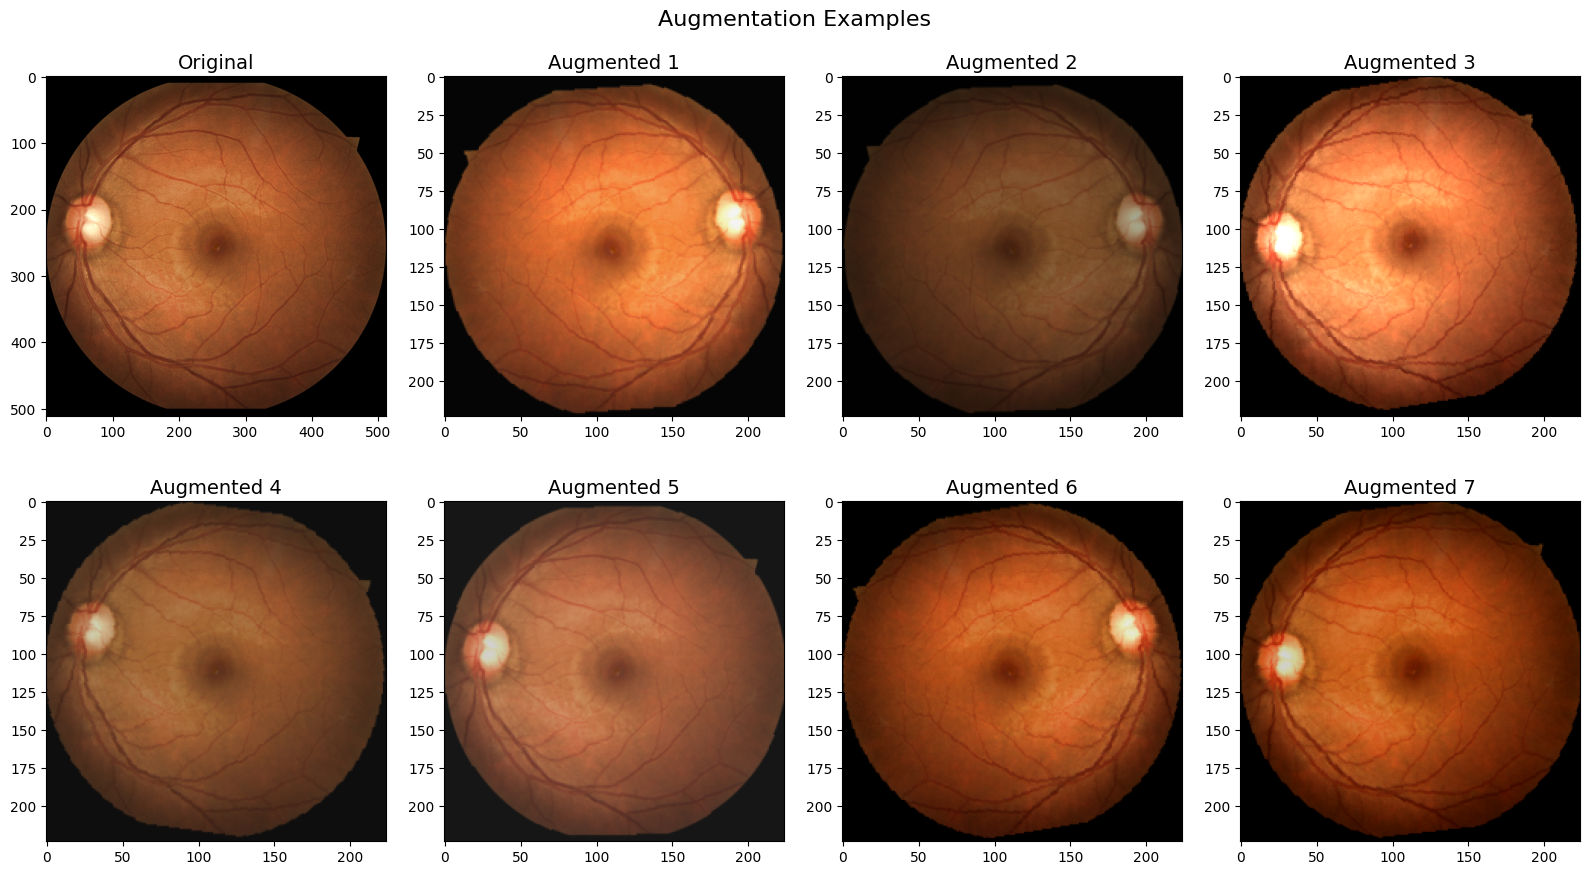

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
from src.utils import crop_and_pad_image
from torchvision import transforms as T

# Load the source image
image_path = image_files[2]  # Assuming image_files is defined elsewhere
src_image = Image.open(image_path)

# Crop and pad the image
cropped_image = crop_and_pad_image(image_path)

# Define the transformation
transform = T.Compose([
    T.Resize((224, 224)),
    T.RandomAffine(degrees=10, translate=(0.01, 0.01), scale=(0.99, 1.01)),
    T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.01),
    T.RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
])

# Apply the transformation multiple times and show the results
num_augmentations = 7
fig, axes = plt.subplots(2, 4, figsize=(16, 9))

# Flatten the axes array
axes = axes.flatten()

# Set title for the entire figure
fig.suptitle("Augmentation Examples", fontsize=16)

# Original cropped image
axes[0].imshow(cropped_image)
axes[0].set_title("Original", fontsize=14)

# Apply augmentation and display
for i in range(1, num_augmentations + 1):
    augmented_image = transform(cropped_image).permute(1, 2, 0)
    axes[i].imshow(augmented_image)
    axes[i].set_title(f"Augmented {i}", fontsize=14)

# Hide remaining axes
for ax in axes[num_augmentations + 1:]:
    ax.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

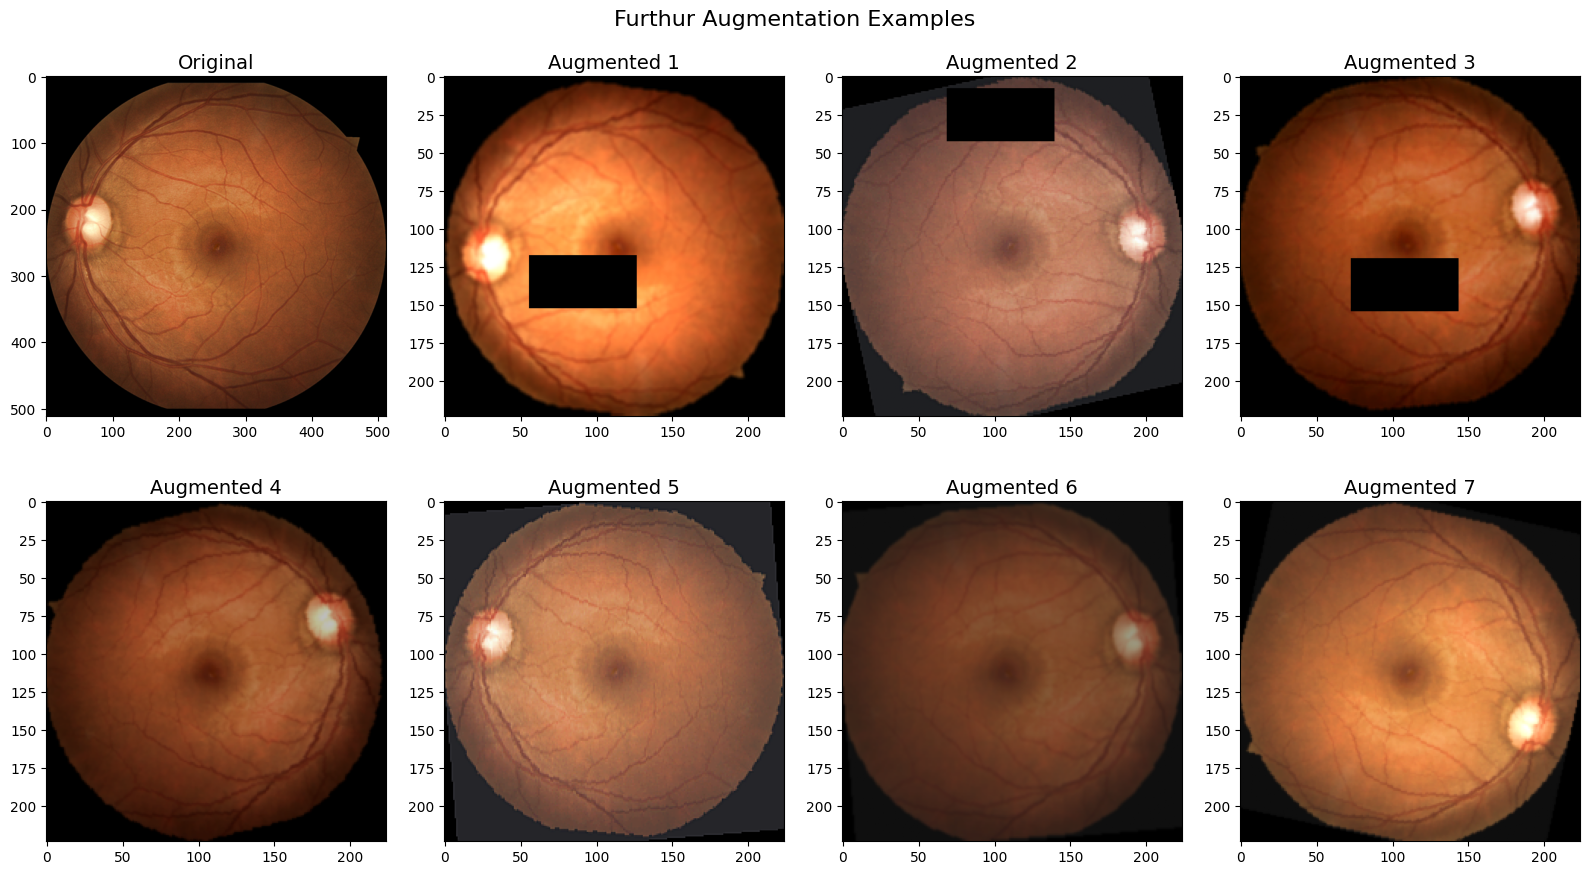

In [32]:
from PIL import Image
import matplotlib.pyplot as plt
from src.utils import crop_and_pad_image
from torchvision import transforms as T

# Load the source image
image_path = image_files[2]  # Assuming image_files is defined elsewhere
src_image = Image.open(image_path)

# Crop and pad the image
cropped_image = crop_and_pad_image(image_path)

# Define the transformation
transform = T.Compose([
    T.Resize((224, 224)),
    T.RandomAffine(degrees=10, translate=(0.01, 0.01), scale=(0.99, 1.01)),
    T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.01),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomRotation(degrees=15),
    T.RandomVerticalFlip(p=0.5),
    T.GaussianBlur(kernel_size=3),  # You can adjust kernel size as needed
    T.RandomResizedCrop(size=(224, 224), scale=(0.99, 1.0), ratio=(0.75, 1.333)),
    T.RandomAdjustSharpness(sharpness_factor=2),
    T.RandomAutocontrast(),
    T.ToTensor(),
    T.RandomErasing(p=0.2, scale=(0.05, 0.05), ratio=(0.5, 0.5)),
])

# Apply the transformation multiple times and show the results
num_augmentations = 8
fig, axes = plt.subplots(2, num_augmentations // 2, figsize=(16, 9))

# Flatten the axes array
axes = axes.flatten()

# Set title for the entire figure
fig.suptitle("Furthur Augmentation Examples", fontsize=16)

# Original cropped image
axes[0].imshow(cropped_image)
axes[0].set_title("Original", fontsize=14)

# Apply augmentation and display
for i in range(1, num_augmentations):
    augmented_image = transform(cropped_image).permute(1, 2, 0)
    axes[i].imshow(augmented_image)
    axes[i].set_title(f"Augmented {i}", fontsize=14)

# Hide remaining axes
for ax in axes[num_augmentations:]:
    ax.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()